<a href="https://colab.research.google.com/github/wyctorfogos/Ensemble-classifiers-comparison/blob/main/Voting_and_Staching_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
%matplotlib inline
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import time
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import style
import time
import cv2
import collections
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Iris Dataset
digits=datasets.load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

# Import dataset and labels
x_origin = digits.data
y = digits.target   # 150 labels = 50 + 50 + 50

<Figure size 432x288 with 0 Axes>

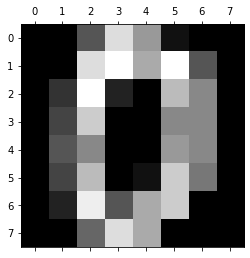

In [3]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [4]:
x=x_origin/255.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

In [6]:
X_train

array([[0.        , 0.00784314, 0.05882353, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02352941, ..., 0.01176471, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.03137255,
        0.        ],
       ...,
       [0.        , 0.00784314, 0.0627451 , ..., 0.01960784, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03529412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01960784, 0.        ,
        0.        ]])

#Test classifiers

In [7]:
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error


def Tester_differentes_modeles(X_train, Y_train, x_val, y_val):
  classifiers = [
      RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100),
      KNeighborsClassifier(5),
      #MultiOutputRegressor(AdaBoostRegressor(random_state=6, n_estimators=100)),
      #MLPRegressor(hidden_layer_sizes=(50,50,50,50,50),solver='lbfgs',activation='tanh'),
      XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)]

  names = []
  scores = []
  erreurs = []
  
  for cls in classifiers:
      cls = cls.fit(X_train, Y_train)
      y_pred = cls.predict(x_val)
      
      names.append(cls.__class__.__name__)
      #scores.append(accuracy_score(ypred, y_val))
      scores.append(cls.score(x_val,y_val))
      erreurs.append(mean_squared_error(y_val, y_pred, squared=True))

  #names.append('Neural Network')

  #y_pred = model.predict(x_val)  #cross_val_predict(model, X_train, Y_train, cv = cv)
  #print(y_pred, y_val)
  #y_pred=(np.around(y_pred))

  #y_Pred=[]
  #for i in range(0,len(y_pred)):
      #print(np.argmax(y_pred[i]))
  #    y_Pred.append(np.argmax(y_pred[i]))
  #print(y_Pred)
  #scores.append(model.score(x_val, y_val))

  score_df = pd.DataFrame({'Model': names,'Score': scores})
  print(score_df)
  
  ax  = score_df.plot.bar()
  ax.set_xticklabels(score_df['Model'], rotation=45, fontsize=10)

                    Model     Score
0  RandomForestClassifier  0.957912
1    KNeighborsClassifier  0.981481
2           XGBClassifier  0.914141


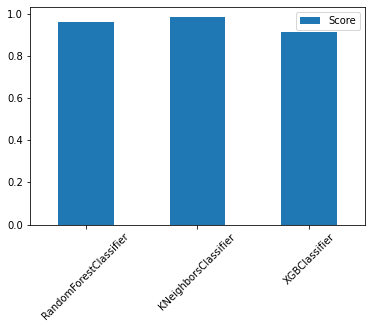

In [8]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
  #Tester_differentes_modeles(X_train, Y_train, X_test, Y_test)
  Tester_differentes_modeles(X_train, Y_train, X_test, Y_test)

Voting Classifier


In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# define dataset
# define the base models
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))
# define the hard voting ensemble
#The performance using the 3 models #
ensemble1 = VotingClassifier(estimators=models, voting='hard')
ensemble1.fit(X_train, Y_train)
ensemble1_score= ensemble1.score(X_test,Y_test)
#The performance using 2 models: RandomForest and KNN5#
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))

ensemble2 = VotingClassifier(estimators=models, voting='hard')
ensemble2.fit(X_train, Y_train)
ensemble2_score= ensemble2.score(X_test,Y_test)

#The performance using 2 models: RandomForest and XGBCls#
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))
ensemble3 = VotingClassifier(estimators=models, voting='hard')
ensemble3.fit(X_train, Y_train)
ensemble3_score= ensemble3.score(X_test,Y_test)

#The performance using 2 models: KNN5 and XGBCls #
models = list()
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))

ensemble4 = VotingClassifier(estimators=models, voting='hard')
ensemble4.fit(X_train, Y_train)
ensemble4_score= ensemble4.score(X_test,Y_test)


                      Model     Score
0  RandomForest+KNN5+XGBCls  0.969697
1         RandomForest+KNN5  0.962963
2       RandomForest+XGBCls  0.941077
3               KNN5+XGBCls  0.947811


[Text(0, 0, 'RandomForest+KNN5+XGBCls'),
 Text(0, 0, 'RandomForest+KNN5'),
 Text(0, 0, 'RandomForest+XGBCls'),
 Text(0, 0, 'KNN5+XGBCls')]

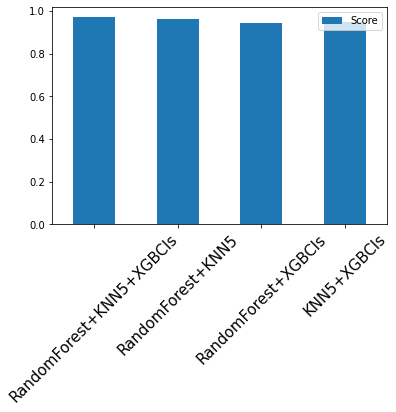

In [10]:
from sklearn import ensemble

names = []
scores = []
erreurs = []
  
classifiers_name=["RandomForest+KNN5+XGBCls","RandomForest+KNN5", "RandomForest+XGBCls","KNN5+XGBCls"]
classifiers_score=[ensemble1_score, ensemble2_score,ensemble3_score,ensemble4_score]

for cls, cls_score in zip(classifiers_name,classifiers_score):
  names.append(cls)
  scores.append(cls_score)

score_df = pd.DataFrame({'Model': names,'Score': scores})
print(score_df)
  
ax  = score_df.plot.bar()
ax.set_xticklabels(score_df['Model'], rotation=45, fontsize=15)

Stacking

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
# define dataset
# define the base models
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))
# define the hard voting ensemble
#The performance using the 3 models #
ensemble1 = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

with tf.device('/device:GPU:0'):
  ensemble1.fit(X_train, Y_train)
  
ensemble1_score= ensemble1.score(X_test,Y_test)
#The performance using 2 models: RandomForest and KNN5#
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))

ensemble2 = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

with tf.device('/device:GPU:0'):
  ensemble2.fit(X_train, Y_train)
ensemble2_score= ensemble2.score(X_test,Y_test)

#The performance using 2 models: RandomForest and XGBCls#
models = list()
models.append(('RandomForest', RandomForestClassifier(max_depth=6, random_state=3,n_estimators=100)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))
ensemble3 = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

with tf.device('/device:GPU:0'):
  ensemble3.fit(X_train, Y_train)
ensemble3_score= ensemble3.score(X_test,Y_test)

#The performance using 2 models: KNN5 and XGBCls #
models = list()
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('XGBCls', XGBClassifier(max_depth=6, learning_rate=5e-3, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None)))

ensemble4 = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

with tf.device('/device:GPU:0'):
  ensemble4.fit(X_train, Y_train)
ensemble4_score= ensemble4.score(X_test,Y_test)


                      Model     Score
0  RandomForest+KNN5+XGBCls  0.983165
1         RandomForest+KNN5  0.984848
2       RandomForest+XGBCls  0.961279
3               KNN5+XGBCls  0.983165


[Text(0, 0, 'RandomForest+KNN5+XGBCls'),
 Text(0, 0, 'RandomForest+KNN5'),
 Text(0, 0, 'RandomForest+XGBCls'),
 Text(0, 0, 'KNN5+XGBCls')]

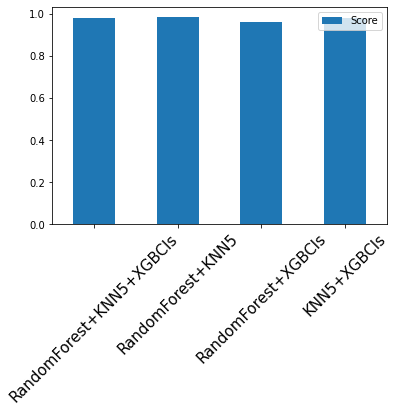

In [12]:
from sklearn import ensemble

names = []
scores = []
erreurs = []
  
classifiers_name=["RandomForest+KNN5+XGBCls","RandomForest+KNN5", "RandomForest+XGBCls","KNN5+XGBCls"]
classifiers_score=[ensemble1_score, ensemble2_score,ensemble3_score,ensemble4_score]

for cls, cls_score in zip(classifiers_name,classifiers_score):
  names.append(cls)
  scores.append(cls_score)

score_df = pd.DataFrame({'Model': names,'Score': scores})
print(score_df)
  
ax  = score_df.plot.bar()
ax.set_xticklabels(score_df['Model'], rotation=45, fontsize=15)

# Optimisation

Random Forest

In [13]:
%%time
from sklearn.model_selection import GridSearchCV
import itertools

params = {'max_depth':[5,10,15], 'random_state':[0,1,2,3,123], 'n_estimators':[10,25,50,100,250,500,1000]}

random_forest_grid = GridSearchCV(RandomForestClassifier(max_depth=5, random_state=50), param_grid=params, n_jobs=-1, cv=5, verbose=5)

with tf.device('/device:GPU:0'):
  random_forest_grid.fit(X_train,Y_train)

print('Train R^2 Score : %.3f'%random_forest_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%random_forest_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%random_forest_grid.best_score_)
print('Best Parameters : ',random_forest_grid.best_params_)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Train R^2 Score : 1.000
Test R^2 Score : 0.978
Best R^2 Score Through Grid Search : 0.976
Best Parameters :  {'max_depth': 10, 'n_estimators': 1000, 'random_state': 123}
CPU times: user 7.52 s, sys: 476 ms, total: 8 s
Wall time: 5min 4s


XGBClassifier

In [14]:
params = {'estimator__max_depth':[5,10,15], 'estimator__random_state':[0,1,2,3,123], 'estimator__n_estimators':[10,25,50,100,250,500,1000]}

XGBClassifier_grid = GridSearchCV(XGBClassifier(max_depth=5, learning_rate=5e-2, n_estimators=100, silent=True, 
                  objective='reg:linear', gamma=0, min_child_weight=1, 
                  max_delta_step=0, subsample=1, colsample_bytree=1, 
                  seed=0, missing=None), param_grid=params, n_jobs=-1, cv=5, verbose=5)

with tf.device('/device:GPU:0'):
  XGBClassifier_grid.fit(X_train,Y_train)

print('Train R^2 Score : %.3f'%XGBClassifier_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%XGBClassifier_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%XGBClassifier_grid.best_score_)
print('Best Parameters : ',XGBClassifier_grid.best_params_)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Train R^2 Score : 1.000
Test R^2 Score : 0.946
Best R^2 Score Through Grid Search : 0.943
Best Parameters :  {'estimator__max_depth': 5, 'estimator__n_estimators': 10, 'estimator__random_state': 0}
